## Exercise meanshift
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
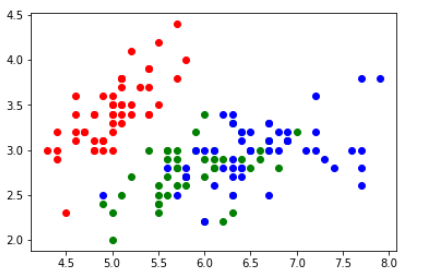
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

In [20]:
from sklearn import datasets
import pandas as pd
data = datasets.load_iris()
#data = iris.data
#target = iris.target
#flower_types = iris.target_names
#features = iris.feature_names
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["species"] = iris.target

target_names = {0: "Iris-Setosa", 1: "Iris-Versicolour", 2:"Iris-Virginica" }

df['species'] =df['species'].map(target_names)
df.head()




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,3.6,1.4,0.2,Iris-Setosa


In [22]:
df = df[['sepal length (cm)','sepal width (cm)','species']]
df.head()

,sepal length (cm),sepal width (cm),species
0,5.1,3.5,Iris-Setosa
1,4.9,3.0,Iris-Setosa
2,4.7,3.2,Iris-Setosa
3,4.6,3.1,Iris-Setosa
4,5.0,3.6,Iris-Setosa


In [34]:
species = df['species'].unique()
print(species)

['Iris-Setosa' 'Iris-Versicolour' 'Iris-Virginica']


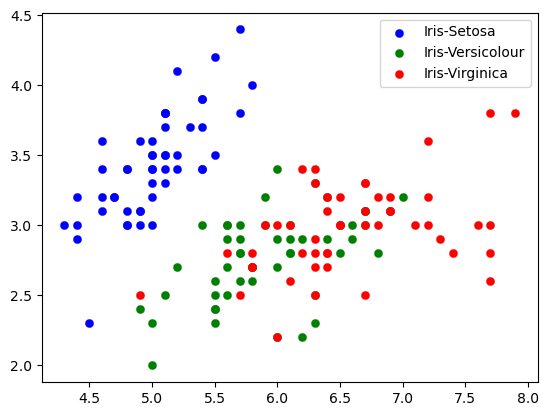

In [68]:
import matplotlib.pyplot as plt
from itertools import cycle

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for s,  col in zip(species, colors):
    
    x, y = df[df['species'] == s]['sepal length (cm)'], df[df['species'] == s]['sepal width (cm)']
    ax.scatter(x, y, c=col,label=s, linewidth=0.2)
    ax.legend()
plt.show()

In [69]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

bandwidth = estimate_bandwidth(df[['sepal length (cm)','sepal width (cm)']], quantile=0.2, 
                                   n_samples=df[['sepal length (cm)','sepal width (cm)']].size)
ms = MeanShift(bandwidth=bandwidth) #, bin_seeding=True) # can be used to speed up process, since fewer kernels are created.
ms.fit(df[['sepal length (cm)','sepal width (cm)']])
labels = ms.labels_

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

print('Number of estimated clusters : {}'.format(n_clusters))
    

Number of estimated clusters : 3


In [123]:
def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth) #, bin_seeding=True) # can be used to speed up process, since fewer kernels are created.
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

In [73]:
labels, cluster_centers, n_clusters = mean_shift(df[['sepal length (cm)','sepal width (cm)']],300)

print(f'Labes: {labels}')
print(f'Custer_centers: {cluster_centers}')
print(f'n_clusters: {n_clusters}')

Number of estimated clusters : 3
Labes: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 0 0 2 1 2 0 2 0
 0 0 0 0 0 0 2 2 0 0 0 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Custer_centers: [[6.08727273 2.90181818]
 [5.         3.37692308]
 [7.6        3.73333333]]
n_clusters: 3


Number of estimated clusters : 5


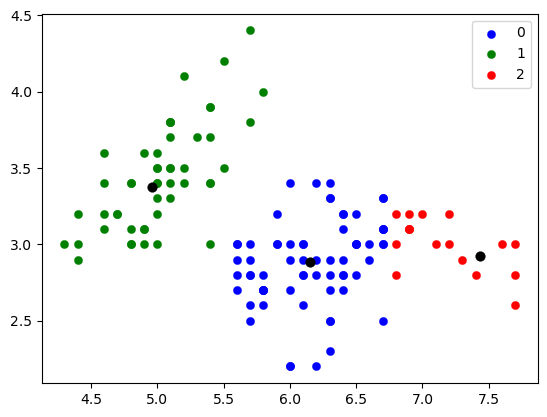

In [122]:
labels, cluster_centers, n_clusters = mean_shift(df[['sepal length (cm)','sepal width (cm)']],300)

fig = plt.figure()
ax = fig.add_subplot(111)


colors = cycle('bgrcmy')
for s, k, col in zip(species,range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = df[my_members]['sepal length (cm)'], df[my_members]['sepal width (cm)']
    ax.scatter(x, y, c=col,label=k, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    ax.legend()
plt.show()

Number of estimated clusters : 3


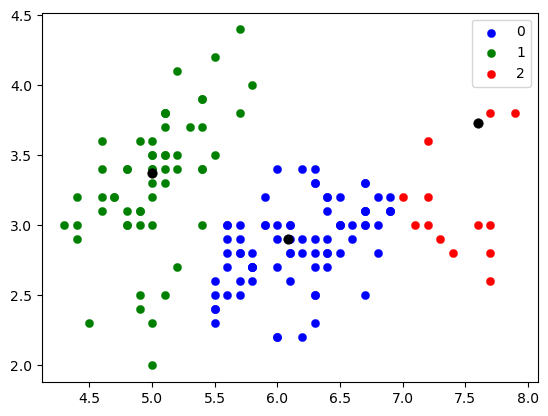

In [124]:
labels, cluster_centers, n_clusters = mean_shift(df[['sepal length (cm)','sepal width (cm)']],300)

fig = plt.figure()
ax = fig.add_subplot(111)


colors = cycle('bgrcmy')
for s, k, col in zip(species,range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = df[my_members]['sepal length (cm)'], df[my_members]['sepal width (cm)']
    ax.scatter(x, y, c=col,label=k, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    ax.legend()
plt.show()